In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
data = pd.read_csv("smart_houses.csv")

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   n_moradores  125 non-null    int64  
 1   idosos       125 non-null    int64  
 2   def_loc      125 non-null    int64  
 3   def_b_v      125 non-null    int64  
 4   def_cog      125 non-null    int64  
 5   def_aud      125 non-null    int64  
 6   comodos      125 non-null    int64  
 7   r_anual      125 non-null    float64
 8   classe       125 non-null    object 
 9   A            125 non-null    float64
 10  B            125 non-null    float64
 11  C            125 non-null    float64
 12  D            125 non-null    float64
 13  E            125 non-null    float64
 14  instalacao   125 non-null    int64  
 15  preco        125 non-null    float64
 16  tipo_sh      125 non-null    object 
 17  familia      125 non-null    object 
 18  crianca      125 non-null    int64  
dtypes: float

In [33]:
data.tipo_sh.value_counts()

SHBV    25
SHDC    21
SHDL    21
SHI     21
SHDA    20
SH      17
Name: tipo_sh, dtype: int64

In [34]:
data.loc[:,['n_moradores','r_anual', 'classe', 'preco','tipo_sh','familia','crianca'] ]

,n_moradores,r_anual,classe,preco,tipo_sh,familia,crianca
0,4,155904.0,alta,302001.00,SH,PF,1
1,5,204940.0,alta,301484.70,SH,PF,2
2,4,167992.0,alta,294055.15,SH,FAM,0
3,4,174720.0,alta,283162.00,SH,FAM,0
4,5,198425.0,alta,273463.00,SH,PF,2
...,...,...,...,...,...,...,...
120,2,29644.0,baixa,129584.70,SHI,CAS,0
121,2,29600.0,baixa,129571.70,SHI,CAS,0
122,7,100950.0,baixa,128217.00,SHI,FAM,3
123,2,30000.0,baixa,124317.54,SHI,CAS,0


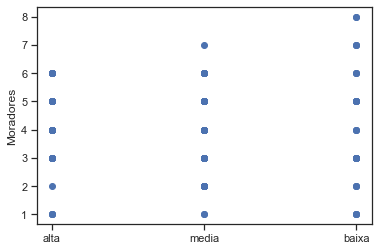

In [35]:
plt.scatter(data['classe'], data['n_moradores'])
plt.ylabel("Moradores")
plt.show()

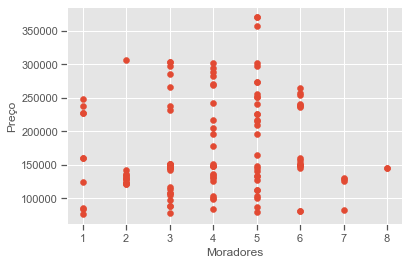

In [36]:
from matplotlib import style
style.use("ggplot")
plt.xlabel("Moradores")
plt.ylabel("Preço")
plt.scatter(data['n_moradores'],data['preco'])

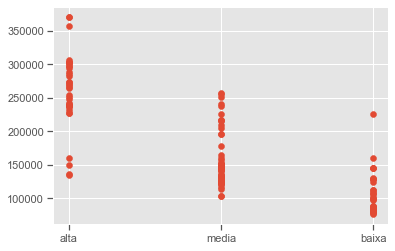

In [37]:
plt.scatter(data['classe'],data['preco'])

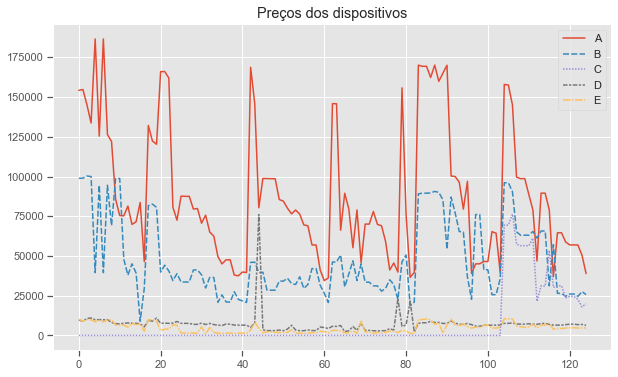

In [38]:
plt.figure(figsize = (10,6))
plt.title("Preços dos dispositivos")
data_line = (data['A'],data['B'], data['C'], data['D'], data['E'])
sns.lineplot(data = data_line)

Text(0, 0.5, ' Renda Anual')

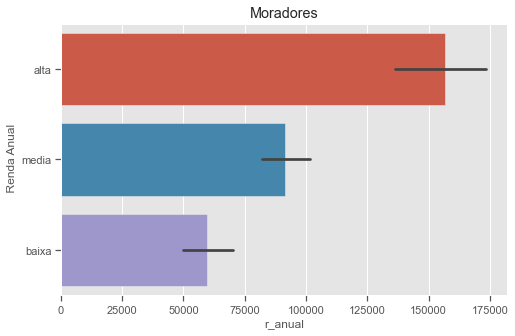

In [39]:
plt.figure(figsize=(8,5))

plt.title("Moradores")

sns.barplot(x=data['r_anual'], y= data['classe'])

plt.ylabel(" Renda Anual")


Text(0.5, 39.5, 'Amostras')

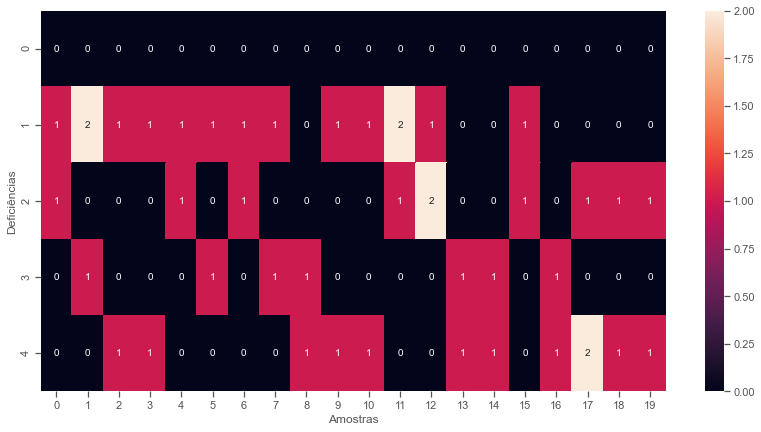

In [40]:
plt.figure(figsize = (14,7))
data_heat = (data['idosos'].head(20), data['def_loc'].head(20),data['def_b_v'].head(20), 
             data['def_cog'].head(20), data['def_aud'].head(20))

sns.heatmap(data = data_heat, annot=True)

plt.ylabel("Deficiências")
plt.xlabel("Amostras")

In [41]:
pd.DataFrame(data_heat)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
idosos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
def_loc,1,2,1,1,1,1,1,1,0,1,1,2,1,0,0,1,0,0,0,0
def_b_v,1,0,0,0,1,0,1,0,0,0,0,1,2,0,0,1,0,1,1,1
def_cog,0,1,0,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0
def_aud,0,0,1,1,0,0,0,0,1,1,1,0,0,1,1,0,1,2,1,1


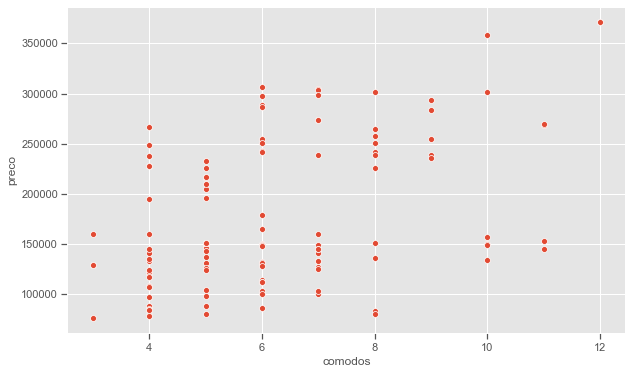

In [42]:
plt.figure(figsize = (10,6))
sns.scatterplot(x=data['comodos'], y= data['preco'])


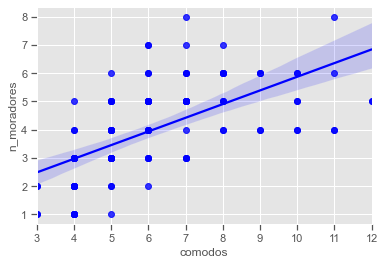

In [43]:
sns.regplot(x=data['comodos'], y= data['n_moradores'], color = 'blue')

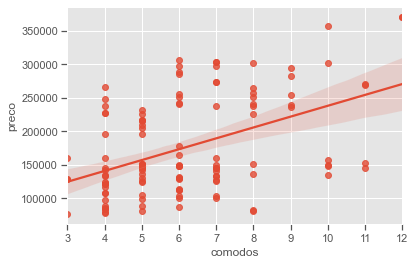

In [44]:
sns.regplot(x=data['comodos'], y= data['preco'])
#linha de regressão

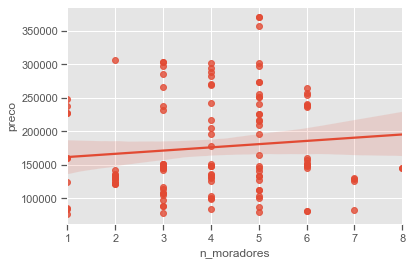

In [45]:
sns.regplot(x=data['n_moradores'], y= data['preco'])

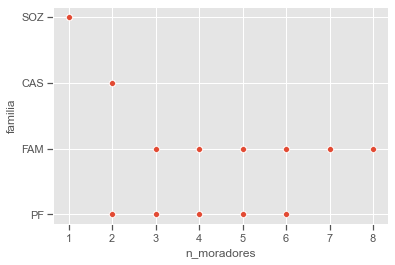

In [46]:
sns.scatterplot(x = data['n_moradores'], y = data['familia'])

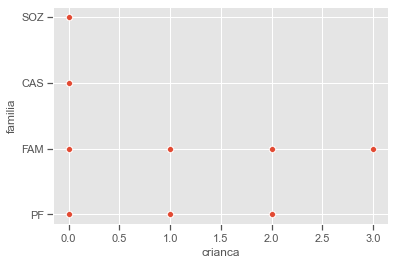

In [47]:
sns.scatterplot(x = data['crianca'], y = data['familia'])

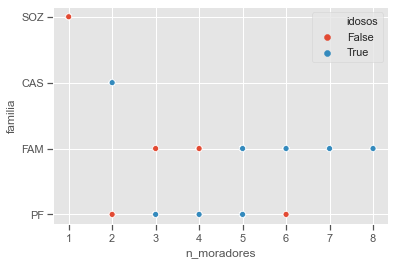

In [48]:
sns.scatterplot(y = data['familia'], x = data['n_moradores'], hue = data['idosos'] != 0)

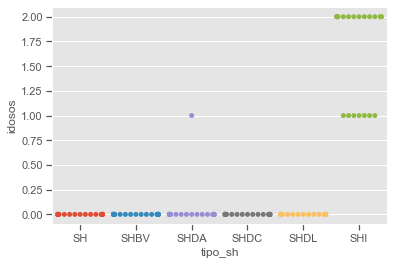

In [49]:
sns.swarmplot(x=data['tipo_sh'],
              y=data['idosos'])

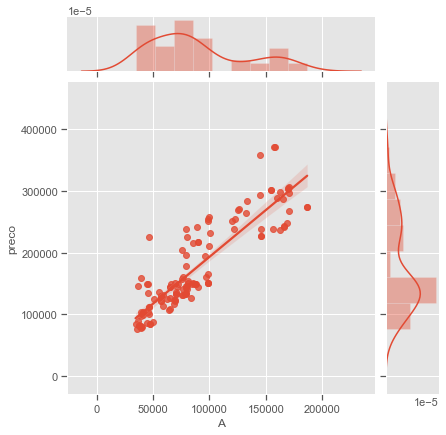

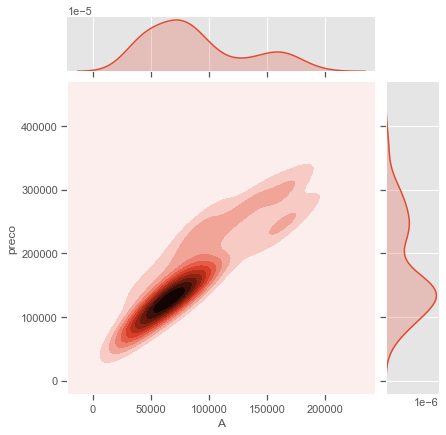

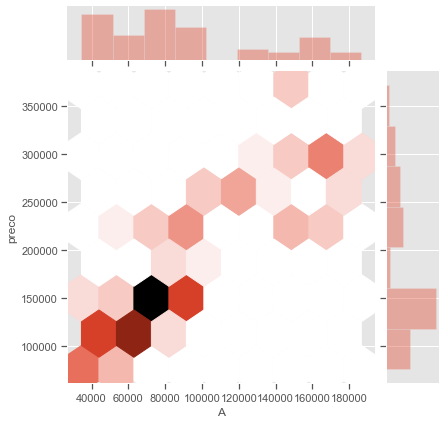

In [50]:
sns.jointplot(x= data['A'], y= data['preco'], kind="reg")
sns.jointplot(x= data['A'], y= data['preco'], kind="kde")
sns.jointplot(x= data['A'], y= data['preco'], kind="hex")


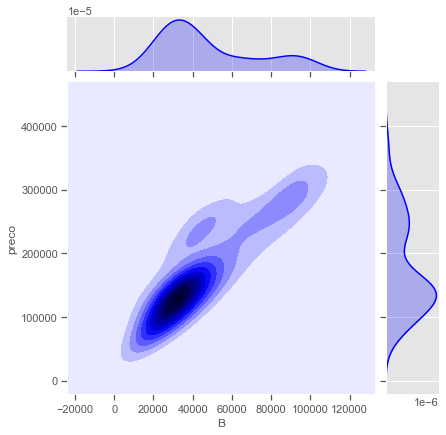

In [51]:
sns.jointplot(x= data['B'], y= data['preco'], kind="kde", color = 'blue')

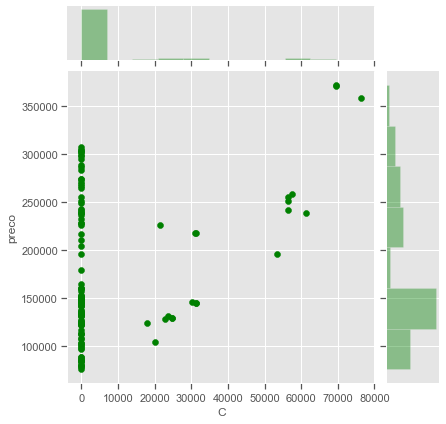

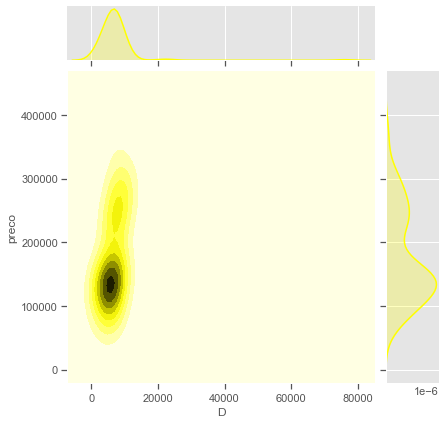

In [52]:
sns.jointplot(x= data['C'], y= data['preco'],color = 'green')
sns.jointplot(x= data['D'], y= data['preco'], kind="kde", color = 'yellow')

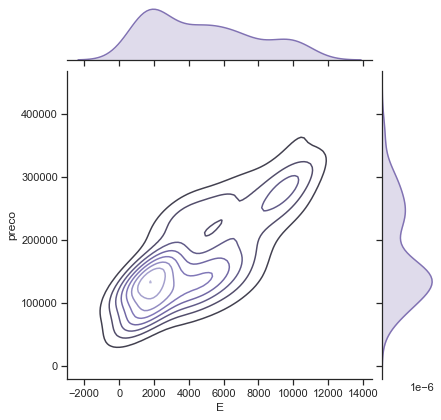

In [53]:
sns.set(style="ticks", color_codes=True)
g = sns.JointGrid(x=data['E'], y=data['preco'], data= data,)
#g = sns.JointGrid(x=data['E'], y=data['preco'], data= data,
                #  xlim=(-10000, 40000), ylim=(0, 400000))
g.plot_joint(sns.kdeplot, cmap="Purples_d")
g.plot_marginals(sns.kdeplot, color="m", shade=True)

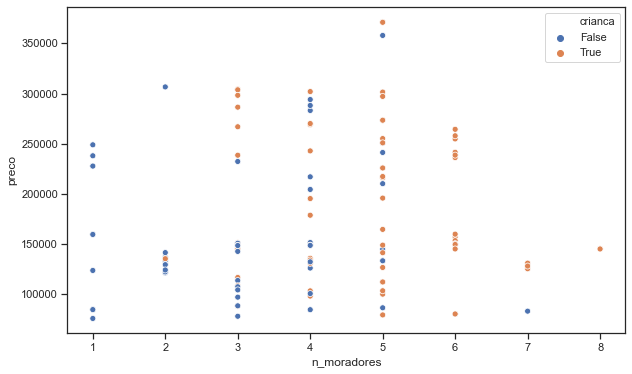

In [54]:
plt.figure(figsize= (10,6))
sns.scatterplot(y = data['preco'], x = data['n_moradores'], hue = data['crianca'] != 0)

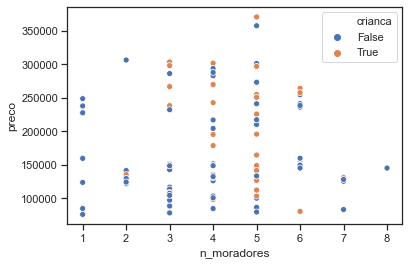

In [67]:
sns.scatterplot(y = data['preco'], x = data['n_moradores'], hue = data['crianca'] == 1)

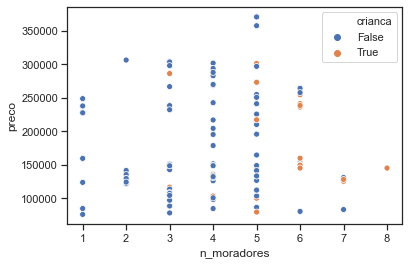

In [62]:
sns.scatterplot(y = data['preco'], x = data['n_moradores'], hue = data['crianca'] >= 2)

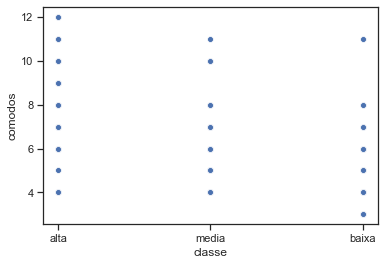

In [57]:
sns.scatterplot(y = data['comodos'], x = data['classe'])

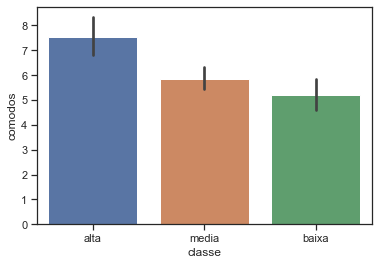

In [58]:
sns.barplot(y=data['comodos'], x= data['classe'])